## 2차 선별 - 항만
1차에서 선별된 지역 내의 항만 중 조건을 충족하는 항만 상위 N개 분류 및 선별

##### < 조건 >
- 수상 스마트팜과 태양광 패널 설치를 위해 '수(물)면적'이 충분해야 하며, 그에 준하는 '부지면적' 역시 갖춰야 함.
- 위 조건으로 엘보우 기법 및 실루엣 기법을 적용했을 때 나오는 결과 k 값에 포함되는 항만이어야 함
- 유통 거리를 현 농장들보다 단축 시킬 수 있어야 함

클러스터 0에 포함된 항구:
  항만명  수(물)면적   부지면적
동해묵호항 29858.0 1250.0
  목포항 39435.0 2538.0
  호산항 24151.0   61.0
  보령항 34679.0    9.0
  대천항 21821.0  346.0

클러스터 1에 포함된 항구:
항만명   수(물)면적    부지면적
부산항 212675.0 11504.0
인천항 317963.0 14960.0
군산항 185730.0  5656.0

클러스터 2에 포함된 항구:
  항만명   수(물)면적    부지면적
  포항항 102989.0  3416.0
  울산항 113179.0  3416.0
  대산항  69916.0   792.0
  광양항 102836.0 10404.0
평택당진항  90992.0  6440.0

클러스터 3에 포함된 항구:
 항만명  수(물)면적   부지면적
 경인항  3468.0 1331.0
 여수항  4706.0  201.0
 마산항 12582.0 1538.0
 장항항  4846.0  223.0
용기포항  1342.0   95.0
연평도항  1589.0  122.0
거문도항   401.0   67.0
흑산도항  1928.0  176.0
 후포항  1015.0  104.0
 울릉항  2115.0   97.0
 추자항   774.0   38.0
 화순항  2078.0  156.0
 서울항   364.0    3.0
 삼척항   996.0  185.0
 옥계항  5646.0  277.0
 속초항  2927.0  332.0
 태안항  8245.0    0.0
 완도항  4631.0  165.0
 하동항  8756.0    0.0
삼천포항  9901.0  488.0
장승포항   706.0   70.0
 옥포항  5998.0   18.0
 통영항  4145.0  163.0
 고현항 12074.0   64.0
 진해항  8217.0  213.0
 제주항  3082.0  689.0
서귀포항  1765.0  198.0
마량진항  1627.0  122.0
 진도항 

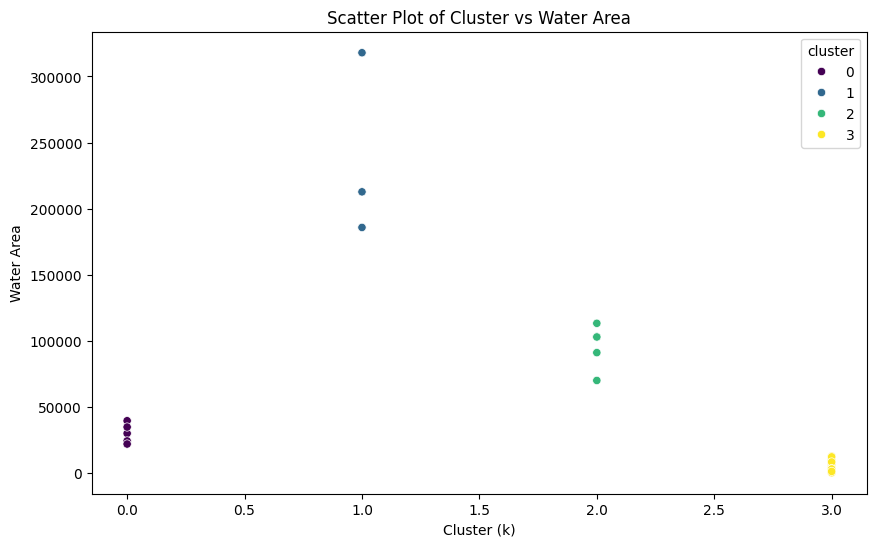

군집화 결과 항만 선정 선택지에 포함될 항만은 부산항, 인천항, 군산항, 포항항, 울산항, 대산항, 광양항, 평택당진항
포항항의 위치를 찾을 수 없습니다. []
평택당진항의 위치를 찾을 수 없습니다. []


In [5]:
import pandas as pd  # CSV 파일을 가져오기 위한 라이브러리 호출
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import requests
import folium

# CSV 파일 경로
file_path = r"C:\Users\rpaeh\Desktop\port_information_20231212.csv"

# 데이터 불러오기
data_df = pd.read_csv(file_path, encoding='euc-kr')

# 불필요한 열 삭제
data_df2 = data_df.drop(['국가관리구분', '항구분', '관리청', '항구역', '설계파고', '설계파향',
                          '평균해면', '해저지질', '방파제길이', '안벽길이', '물양장(소형선부두)길이',
                          '주요취급화물', '기타시설물현황', '잔교수(기)', '상옥수(동)',
                          '야적장면적', '접안능력수(선석)', '최고조위', '하역능력수',
                          '항만위치'], axis=1)

# NaN 값이 있는 행 삭제
data_df2 = data_df2.dropna(subset=['수(물)면적', '부지면적', '항만명'])

# KMeans 클러스터링 수행
k = 4  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=k, random_state=10)
data_df2['cluster'] = kmeans.fit_predict(data_df2[['수(물)면적', '부지면적']])

# 각 클러스터에 포함된 항구명 및 크기 출력
for cluster in range(k):
    print(f"클러스터 {cluster}에 포함된 항구:")
    ports_in_cluster = data_df2[data_df2['cluster'] == cluster][['항만명', '수(물)면적', '부지면적']]
    print(ports_in_cluster.to_string(index=False))  # 인덱스 없이 출력
    print()  # 공백 줄 추가

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_df2['cluster'], y=data_df2['수(물)면적'], hue=data_df2['cluster'], palette='viridis')
plt.xlabel('Cluster (k)')
plt.ylabel('Water Area')
plt.title('Scatter Plot of Cluster vs Water Area')
plt.show()

selected_ports = data_df2[data_df2['cluster'].isin([1, 2])]['항만명']
port_list = selected_ports.tolist()
print(f"군집화 결과 항만 선정 선택지에 포함될 항만은 {', '.join(port_list)}")

map_center = [36.5, 127.5]
m = folium.Map(location=map_center, zoom_start=7)

for port in port_list:
    address = f"{port} 대한민국"
    response = requests.get(f"https://nominatim.openstreetmap.org/search?q={address}&format=json")
    data = response.json()
    
    if data:
        latitude = data[0]['lat']
        longitude = data[0]['lon']
        
        if latitude is not None and longitude is not None:
            try:
                folium.Marker(
                    location=[float(latitude), float(longitude)],
                    popup=port,
                    icon=folium.Icon(color='blue')
                ).add_to(m)
            except ValueError:
                print(f"{port}의 위도 또는 경도가 존재하지 않는 곳")
        else:
            print(f"{port}의 위도 또는 경도를 찾을 수 ㅇ벗음")
    else:
        print(f"{port}의 위치를 찾을 수 없음 {data}")

# 지도 출력
m
